<a href="https://colab.research.google.com/github/ZakariaR1ad/Resume-Classifier/blob/main/HDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
!pip install keras_preprocessing langdetect
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import re
import nltk
from keras_preprocessing.sequence import pad_sequences
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from langdetect import detect
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from transformers import pipeline
import torch
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Loading the dataset

In [ ]:
Dataset = pd.read_csv("resume.csv")
Data = Dataset["Resumes"]


Data_english = []
Data_french = []
Data_arabic = []
Data_other = []
for d in Data:
  try:
    if(detect(d) == "fr"):
      Data_french.append(d)
    elif(detect(d) == "en"):
      Data_english.append(d)
    elif(detect(d) == "ar"):
      Data_arabic.append(d)
    else:
      Data_other.append(d)
  except:
    Data_other.append(d)


In [ ]:
Names = np.array(pd.read_csv("male.csv").iloc[:,1])
Names = np.concatenate([Names,np.array(pd.read_csv("female.csv").iloc[:,1])])

<BarContainer object of 4 artists>

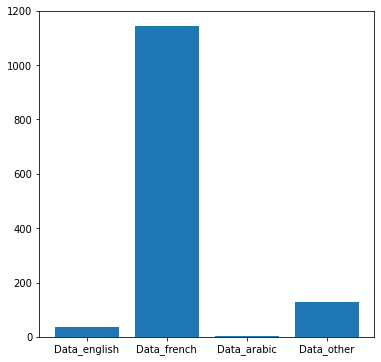

In [ ]:
length = lambda x : [len(i) for i in x]

L = length([Data_english,Data_french,Data_arabic,Data_other])
plt.figure(figsize=(6,6))
plt.bar(["Data_english","Data_french","Data_arabic","Data_other"],L)

In [ ]:
french_resumes = pd.Series(Data_french)
french_resumes.to_csv("french_resumes")

Int64Index([   0,    1,    2,    3,    4,    5,    7,    9,   10,   11,
            ...
            1130, 1132, 1133, 1134, 1136, 1137, 1138, 1140, 1141, 1142],
           dtype='int64', length=783)


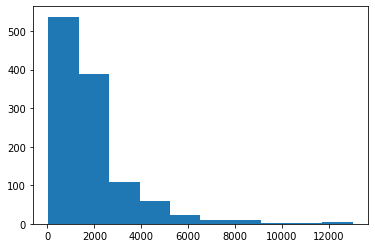

In [ ]:
Y = length(Data_french)
plt.hist(Y)
print(french_resumes[french_resumes.map(len) >1000].index)

In [ ]:

Data_updated = french_resumes.drop(french_resumes[french_resumes.map(len) < 1000].index)
text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]:\S+|nbsp"
special = r'[^a-zA-z0-9.,!?/:;\"\'\s]'

def preprocess(text,stop_words,stem=False):
    stemmer = PorterStemmer()
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    text = re.sub(special, '', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

stop_words = stopwords.words('french')+list(Names)
stemmed_words_X = Data_updated.apply(lambda x: preprocess(x,stop_words,True))


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(stemmed_words_X)
stemmed_words_X.head().reset_index()
X = pad_sequences(tokenizer.texts_to_sequences(stemmed_words_X),maxlen = 300)
X_std = StandardScaler().fit_transform(X)


Text(0, 0.5, 'Count')

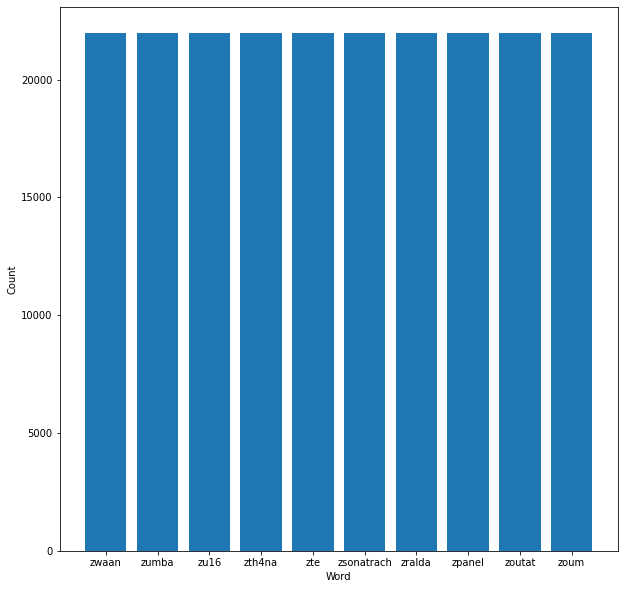

In [ ]:
vec = CountVectorizer().fit(stemmed_words_X)
bag_of_words = vec.transform(stemmed_words_X)
vocab = sorted(vec.vocabulary_.items(), key = lambda x: x[1], reverse=True)
x = [i[0] for i in vocab][:10]
y = [i[1] for i in vocab][:10]
plt.figure(figsize=(10,10))
plt.bar(x,y)
plt.xlabel('Word')
plt.ylabel('Count')

#Clustering

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=15)
dbscan.fit(X_std)
print(dbscan.labels_)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

Text(0, 0.5, 'Inertia')

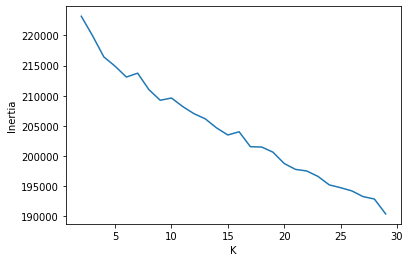

In [ ]:
inertias = []
sizes = range(2, 30)
for k in sizes:
  k2 = KMeans(n_clusters=k)
  k2.fit(X_std)
  inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

#Further cleaning the data


In [ ]:
!pip install transformers

from transformers import pipeline
import torch
line_classifier = pipeline('text-classification', model='has-abi/distilBERT-finetuned-resumes-sections')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
labels = ["contact/name/title","interests","summary"]
modified_data = []
for resume in french_resumes:
  tmp = ""
  for line in resume.split("\n"):
    for part in line.split("  "):
      if("/" in part):
        for small_parts in part.split("/"):
          if(";" in part):
            for smaller_parts in small_parts.split(";"):
              text = re.sub(special, '', str(smaller_parts).lower()).strip()
              try:
                if not (line_classifier(smaller_parts)[0]['label'] in labels):
                  tmp+= text
              except :

                print(part)
                continue
  modified_data.append(tmp)
modified_data = np.array(modified_data)

In [ ]:
pd.Series(modified_data).to_csv("modified_data.csv")

In [ ]:
modified_french_data = [m for m in modified_data if len(m)!=0]
print(len(modified_french_data))

91


In [ ]:
pd.Series(modified_french_data).to_csv("effective_dataset.csv")